In [1]:
import pandas as pd
import optuna
import numpy as np
from keras.models import load_model
from sklearn.metrics import recall_score, f1_score, precision_score
from pinkribbon.plots import learning_curves, plot_loss_recall, plot_confusion, plot_roc_auc
from pinkribbon.models import *
from pinkribbon.dataset import DataGenerator


2025-08-04 23:18:01.192084: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-04 23:18:01.235140: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754342281.281698  133742 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754342281.296002  133742 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754342281.326447  133742 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
columns = ["trial","state","recall","loss","batch_size","dropout_rate","learning_rate","momentum","optimizer","weight_decay","history"]

- resnet_50_1 : 24x24 , clahe
- resnet_50_2 : resnet_preprocessing
- resnet_50_3 : clahe + resnet_preprocessing
- resnet_50_5 : best from resnet_50_2 + unfreeze


In [3]:
candidates = pd.DataFrame(columns=["experimentation","trial","recall","loss"])    

# resnet_50_1

## Taille des images en entrée
50x50x3
## Prétraitement
CLAHE

In [4]:
df = pd.read_csv("../data/resnet50_1.csv",encoding="utf-8", header=0, names=columns)

In [5]:
df_head = df.iloc[:,:-1].sort_values("recall", ascending=False).head(5)
df_head

,trial,state,recall,loss,batch_size,dropout_rate,learning_rate,momentum,optimizer,weight_decay
5,5,COMPLETE,0.800000,0.452690,16,0.296994,0.005009,NaN,Adam,0.000398
6,6,COMPLETE,0.765734,0.459719,64,0.433783,0.001475,NaN,Adam,0.000025
20,20,COMPLETE,0.765734,0.454832,32,0.247934,0.000383,NaN,Adam,0.000005
13,13,COMPLETE,0.762712,0.452072,16,0.328564,0.004096,0.949613,SGD,0.000010
8,8,COMPLETE,0.762238,0.449215,32,0.453019,0.008030,0.806590,SGD,0.000006


In [6]:
candidates.loc[len(candidates)] = ["resnet50_1"]+ list(df_head.iloc[0][["trial","recall","loss"]])

In [7]:
df_head = df.iloc[:,:-1].sort_values("loss", ascending=True).head(5)
df_head

,trial,state,recall,loss,batch_size,dropout_rate,learning_rate,momentum,optimizer,weight_decay
2,2,COMPLETE,0.758741,0.441346,32,0.324897,0.000658,NaN,Adam,0.000794
8,8,COMPLETE,0.762238,0.449215,32,0.453019,0.008030,0.806590,SGD,0.000006
18,18,COMPLETE,0.751748,0.451456,32,0.498501,0.008511,0.818797,SGD,0.000010
13,13,COMPLETE,0.762712,0.452072,16,0.328564,0.004096,0.949613,SGD,0.000010
5,5,COMPLETE,0.800000,0.452690,16,0.296994,0.005009,NaN,Adam,0.000398


In [8]:
candidates.loc[len(candidates)] = ["resnet50_1"]+ list(df_head.iloc[0][["trial","recall","loss"]])

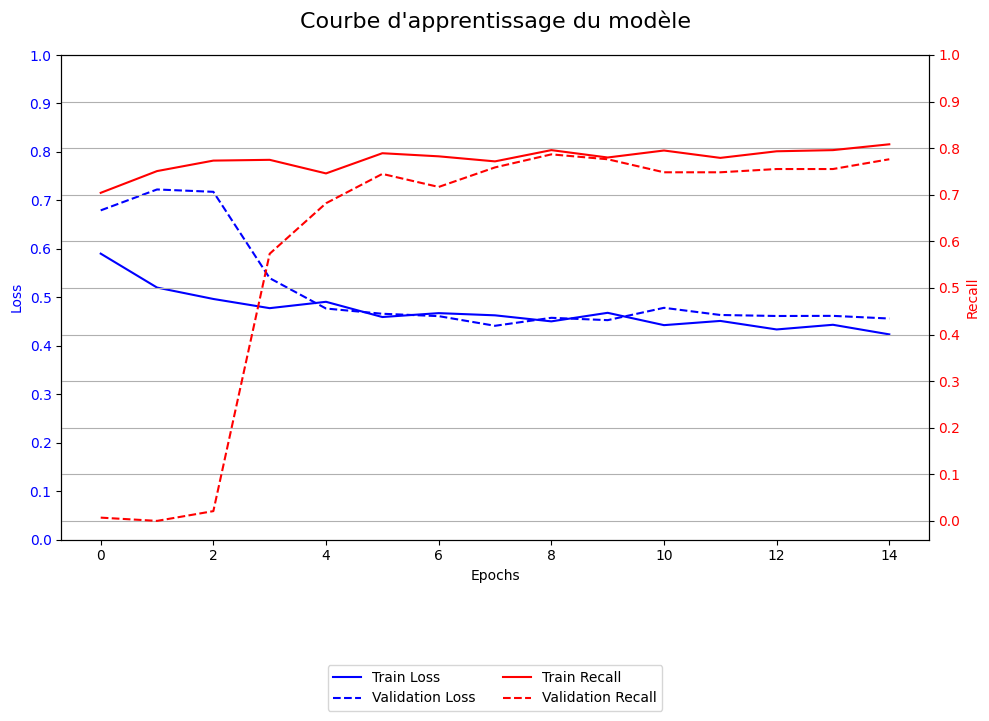

In [9]:
learning_curves(df,2)

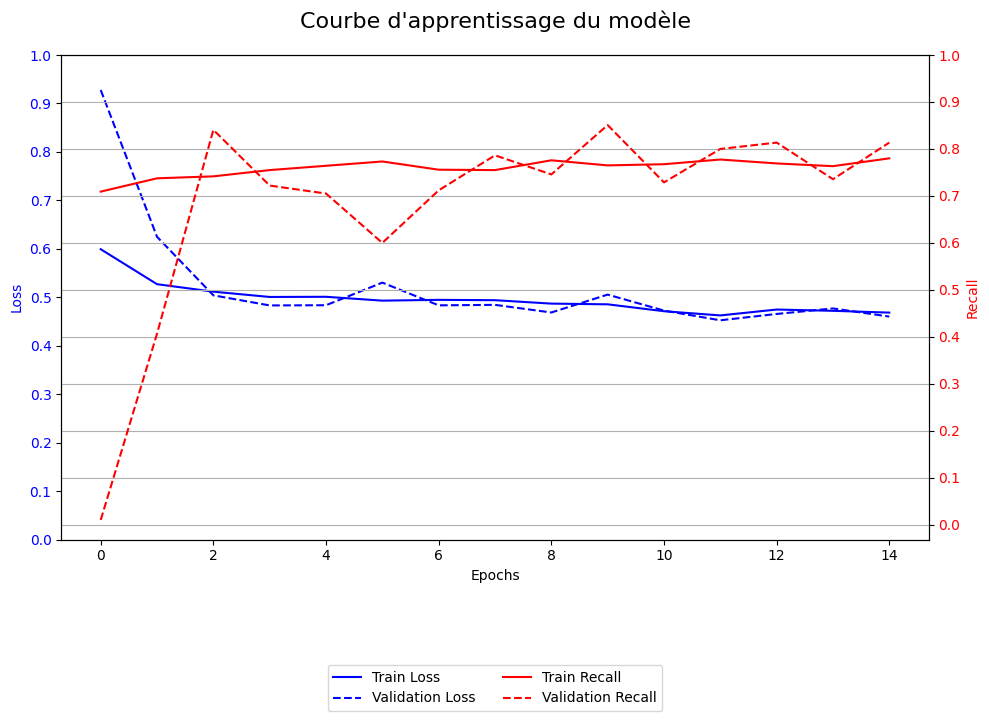

In [10]:
learning_curves(df,5)

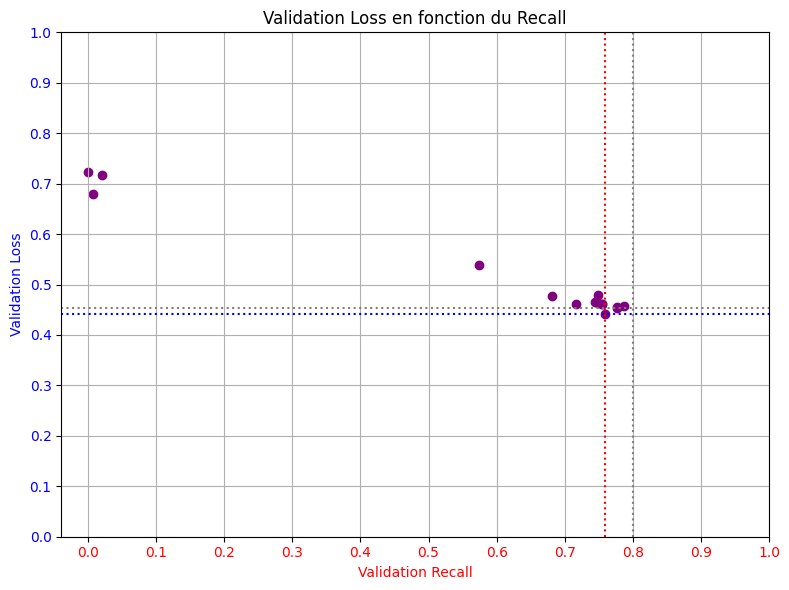

In [11]:
plot_loss_recall(df,2,5)

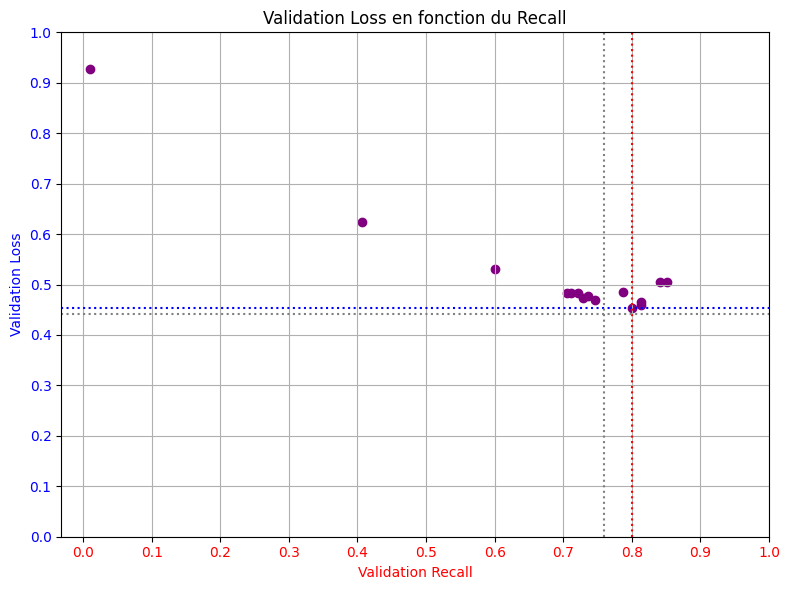

In [12]:
plot_loss_recall(df,5,2)

In [13]:
candidates

,experimentation,trial,recall,loss
0,resnet50_1,5,0.800000,0.452690
1,resnet50_1,2,0.758741,0.441346


## Modèle 5

In [14]:
generator = DataGenerator("../data/BHI.zip", max_samples_per_class=1500, seed=42, experimentation="resnet50_1")
train_generator, val_generator = generator.train_test_split(0.2)
del generator
del train_generator
y_true = np.concatenate([val_generator[i][1] for i in range(len(val_generator))])

In [15]:
model = load_model("../models/resnet50_1_5.keras")
y_pred = model.predict(val_generator)

I0000 00:00:1754342299.015590  133742 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5520 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9
2025-08-04 23:18:21.673238: E tensorflow/core/util/util.cc:131] oneDNN supports DT_HALF only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.
I0000 00:00:1754342302.874770  133913 service.cc:152] XLA service 0x7f696c001740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754342302.874801  133913 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2025-08-04 23:18:22.922434: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1754342303.292867  133913 cuda_dnn.cc:529] Loaded cuDNN ver

 3/75 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step

I0000 00:00:1754342304.925567  133913 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step


In [16]:
print("recall    : ", recall_score(y_true,y_pred>=0.5))
print("precision : ",precision_score(y_true,y_pred>=0.5))
print("F1        : ",f1_score(y_true,y_pred>=0.5))

recall    :  0.82
precision :  0.8282828282828283
F1        :  0.8241206030150754


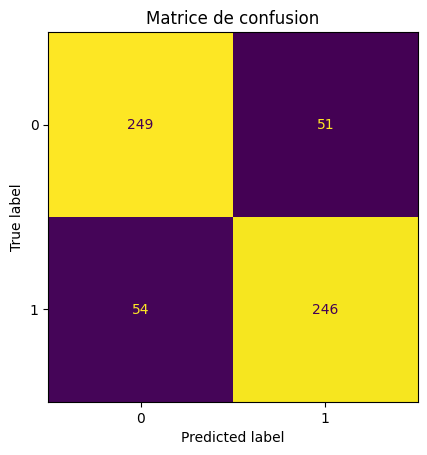

In [17]:
plot_confusion(y_true,y_pred)

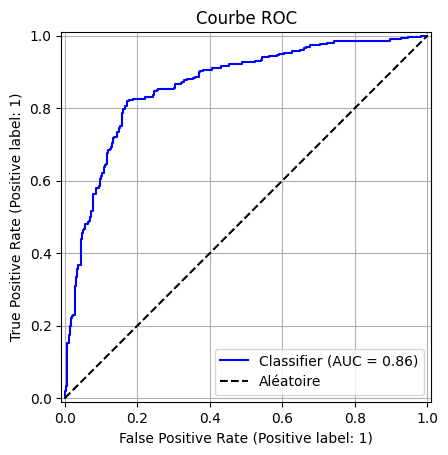

In [18]:
plot_roc_auc(y_true,y_pred)

## Modèle 2

In [19]:
model = load_model("../models/resnet50_1_2.keras")
y_pred = model.predict(val_generator)

75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 138ms/step


In [20]:
print("recall    : ", recall_score(y_true,y_pred>=0.5))
print("precision : ",precision_score(y_true,y_pred>=0.5))
print("F1        : ",f1_score(y_true,y_pred>=0.5))

recall    :  0.7733333333333333
precision :  0.8375451263537906
F1        :  0.804159445407279


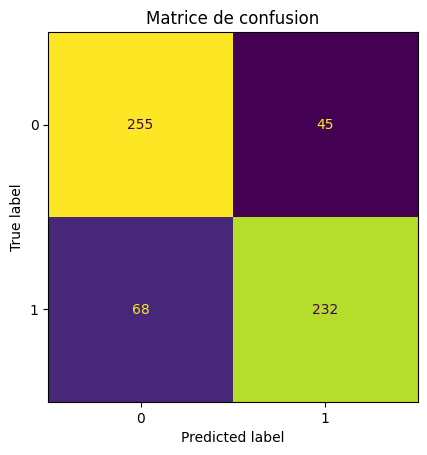

In [21]:
plot_confusion(y_true,y_pred)

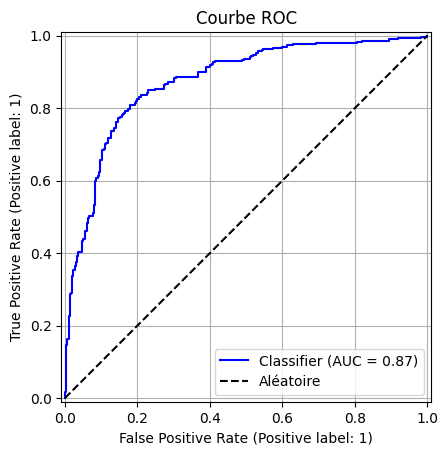

In [22]:
plot_roc_auc(y_true,y_pred)

# resnet_50_2

## Taille des images
224x224x3
## Prétraitement
Préprocessing resnet prépare les images comme elles ont été traitées lors de l'entraînement initial du modèle, sur ImageNet.

Conversion RGB → BGR
OpenCV-style, car les poids ImageNet de ResNet50 attendent ce format.

Soustraction du "mean" BGR d'ImageNet :

Bleu : 103.939

Vert : 116.779

Rouge : 123.68
C’est un centrage (pas une normalisation à [0,1]).

In [23]:
df = pd.read_csv("../data/resnet50_2.csv",encoding="utf-8", header=0, names=columns)

In [24]:
df_head =df.iloc[:,:-1].sort_values("recall", ascending=False).head(5)
df_head

,trial,state,recall,loss,batch_size,dropout_rate,learning_rate,momentum,optimizer,weight_decay
19,19,COMPLETE,0.952542,0.152405,16,0.446487,0.000731,NaN,Adam,0.000002
10,10,COMPLETE,0.949153,0.155574,16,0.441629,0.000280,NaN,Adam,0.000043
3,3,COMPLETE,0.945763,0.154276,16,0.292974,0.001120,NaN,Adam,0.000611
18,18,COMPLETE,0.945763,0.160868,16,0.382873,0.000258,NaN,Adam,0.000009
2,2,COMPLETE,0.937063,0.149066,32,0.228094,0.000457,NaN,Adam,0.000789


In [25]:
candidates.loc[len(candidates)] = ["resnet50_2"]+ list(df_head.iloc[0][["trial","recall","loss"]])

In [26]:
df_head = df.iloc[:,:-1].sort_values("loss", ascending=True).head(5)
df_head

,trial,state,recall,loss,batch_size,dropout_rate,learning_rate,momentum,optimizer,weight_decay
2,2,COMPLETE,0.937063,0.149066,32,0.228094,0.000457,NaN,Adam,0.000789
9,9,COMPLETE,0.926573,0.151898,64,0.231450,0.000237,NaN,Adam,0.000004
19,19,COMPLETE,0.952542,0.152405,16,0.446487,0.000731,NaN,Adam,0.000002
16,16,COMPLETE,0.930070,0.153849,32,0.417719,0.003360,NaN,Adam,0.000440
3,3,COMPLETE,0.945763,0.154276,16,0.292974,0.001120,NaN,Adam,0.000611


In [27]:
candidates.loc[len(candidates)] = ["resnet50_2"]+ list(df_head.iloc[0][["trial","recall","loss"]])

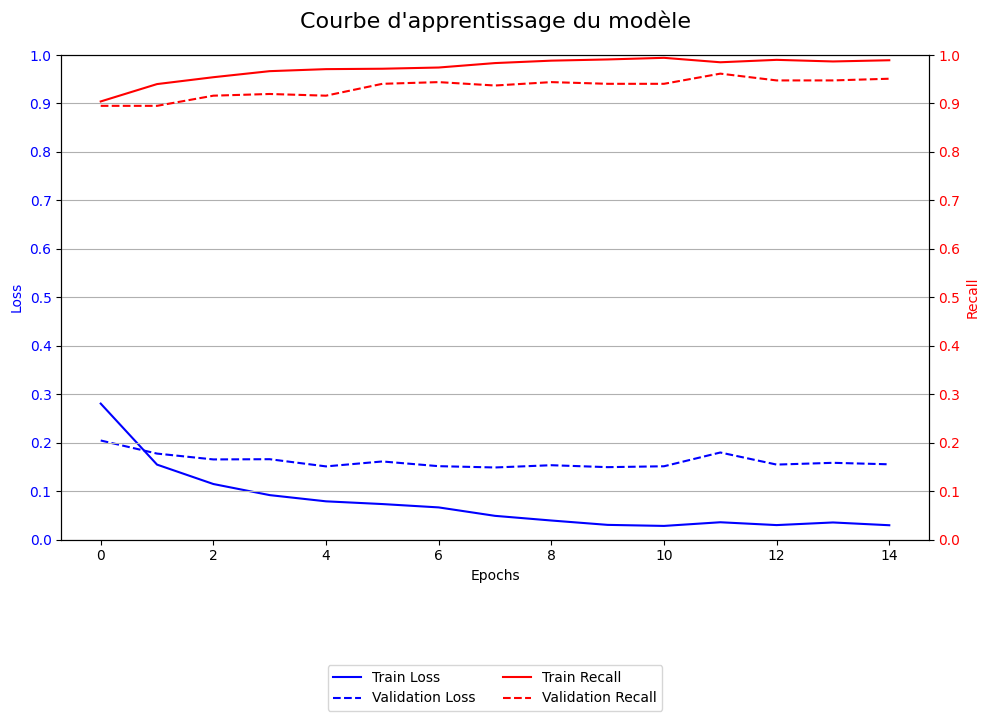

In [28]:
learning_curves(df,2)

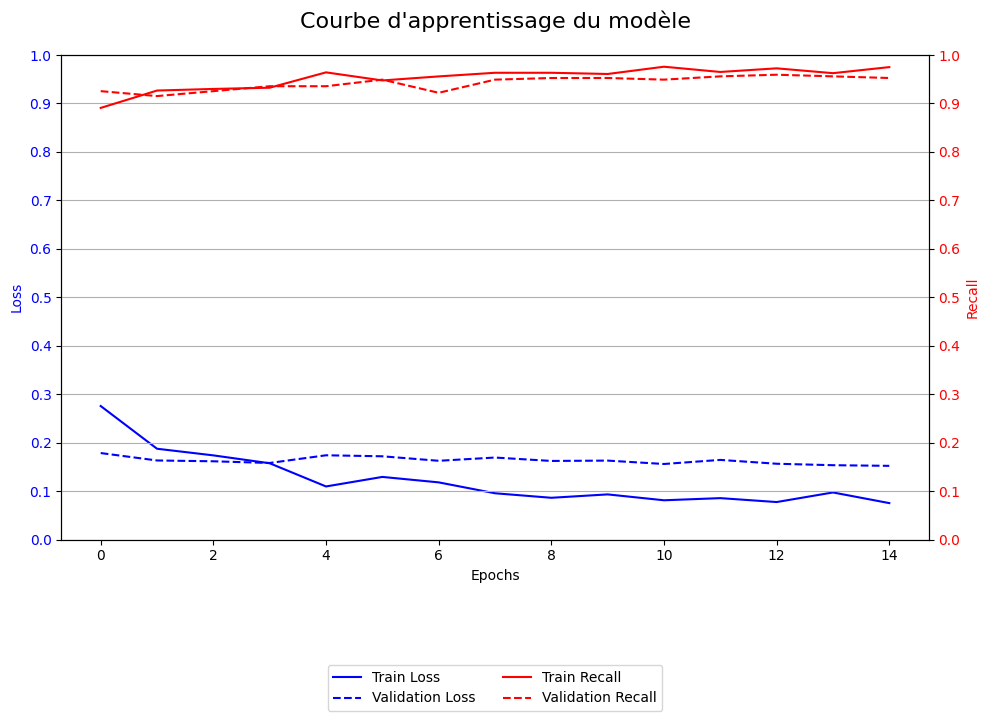

In [29]:
learning_curves(df,19)

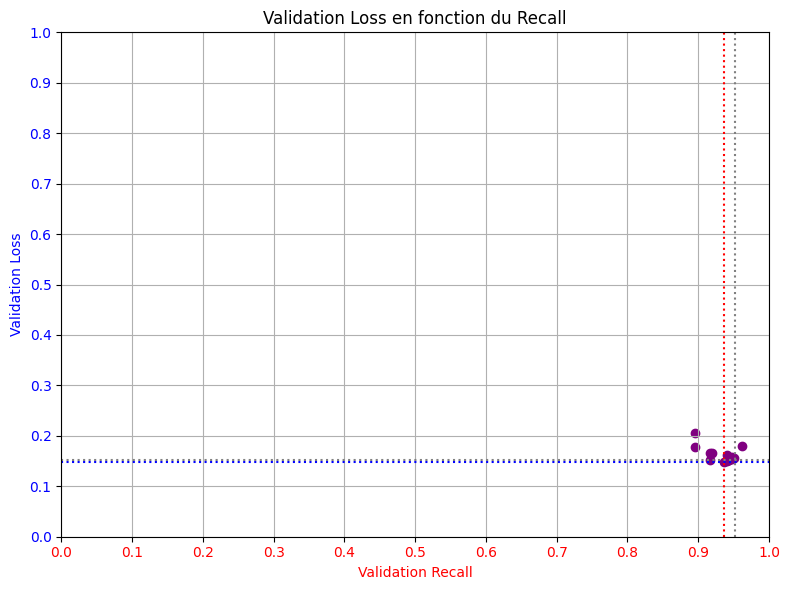

In [30]:
plot_loss_recall(df,2,19)

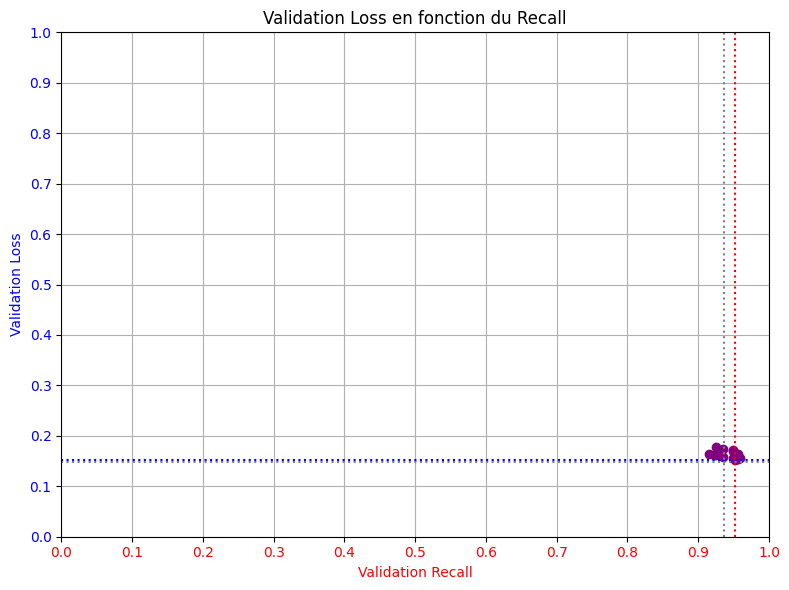

In [31]:
plot_loss_recall(df,19,2)

In [32]:
candidates.sort_values("recall", ascending=False)

,experimentation,trial,recall,loss
2,resnet50_2,19,0.952542,0.152405
3,resnet50_2,2,0.937063,0.149066
0,resnet50_1,5,0.800000,0.452690
1,resnet50_1,2,0.758741,0.441346


In [33]:
candidates.sort_values("loss")

,experimentation,trial,recall,loss
3,resnet50_2,2,0.937063,0.149066
2,resnet50_2,19,0.952542,0.152405
1,resnet50_1,2,0.758741,0.441346
0,resnet50_1,5,0.800000,0.452690


## Modèle 19

In [34]:
model = load_model("../models/resnet50_2_19.keras")
y_pred = model.predict(val_generator)

75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step


In [35]:
print("recall    : ", recall_score(y_true,y_pred>=0.5))
print("precision : ",precision_score(y_true,y_pred>=0.5))
print("F1        : ",f1_score(y_true,y_pred>=0.5))

recall    :  0.78
precision :  0.8181818181818182
F1        :  0.7986348122866894


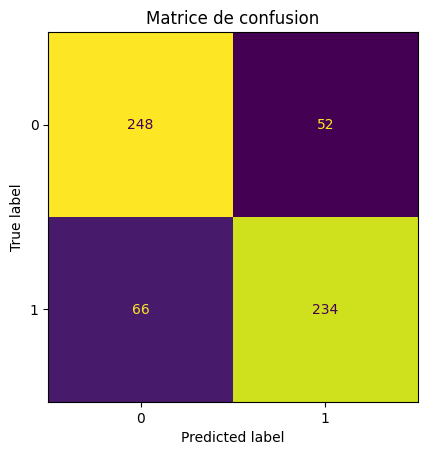

In [36]:
plot_confusion(y_true,y_pred)

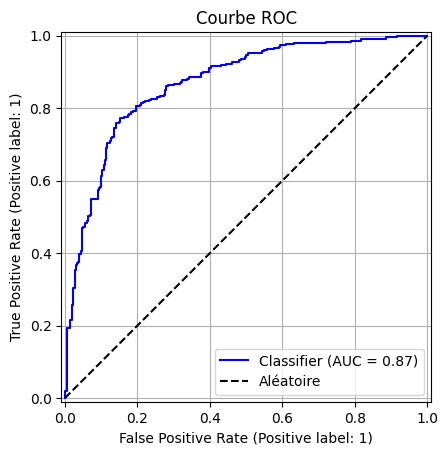

In [37]:
plot_roc_auc(y_true,y_pred)

## Modèle 2

In [38]:
model = load_model("../models/resnet50_2_2.keras")
y_pred = model.predict(val_generator)

75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 140ms/step


In [39]:
print("recall    : ", recall_score(y_true,y_pred>=0.5))
print("precision : ",precision_score(y_true,y_pred>=0.5))
print("F1        : ",f1_score(y_true,y_pred>=0.5))

recall    :  0.77
precision :  0.8339350180505415
F1        :  0.8006932409012132


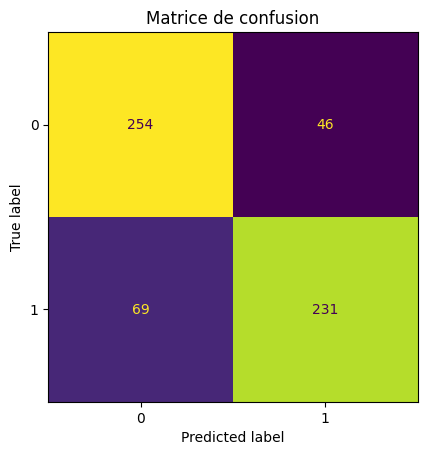

In [40]:
plot_confusion(y_true,y_pred)

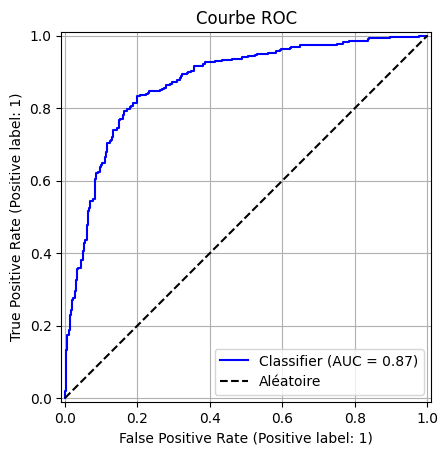

In [41]:
plot_roc_auc(y_true,y_pred)

# resnet_50_3

## Taille des images
224x224x3
## Prétraitements
CLAHE + Préprocessing Resnet.

In [42]:
df = pd.read_csv("../data/resnet50_3.csv",encoding="utf-8", header=0, names=columns)

In [43]:
df_head = df.iloc[:,:-1].sort_values("recall", ascending=False).head(5)
df_head

,trial,state,recall,loss,batch_size,dropout_rate,learning_rate,momentum,optimizer,weight_decay
3,3,COMPLETE,0.937063,0.214731,32,0.261629,0.002315,0.811678,SGD,0.000036
17,17,COMPLETE,0.937063,0.215762,64,0.401793,0.000384,NaN,Adam,0.000246
6,6,COMPLETE,0.932203,0.226313,16,0.344856,0.000511,0.977096,SGD,0.000046
15,15,COMPLETE,0.930070,0.328126,64,0.363617,0.000226,0.819499,SGD,0.000090
4,4,COMPLETE,0.930070,0.209573,64,0.204790,0.000725,NaN,Adam,0.000334


In [44]:
candidates.loc[len(candidates)] = ["resnet50_3"]+ list(df_head.iloc[0][["trial","recall","loss"]])

In [45]:
df_head = df.iloc[:,:-1].sort_values("loss", ascending=True).head(5)
df_head

,trial,state,recall,loss,batch_size,dropout_rate,learning_rate,momentum,optimizer,weight_decay
11,11,COMPLETE,0.919580,0.198574,64,0.490870,0.008840,NaN,Adam,0.000230
2,2,COMPLETE,0.926573,0.204784,32,0.471190,0.004013,0.909751,SGD,0.000001
10,10,COMPLETE,0.926573,0.207172,32,0.348654,0.006091,NaN,Adam,0.000024
4,4,COMPLETE,0.930070,0.209573,64,0.204790,0.000725,NaN,Adam,0.000334
3,3,COMPLETE,0.937063,0.214731,32,0.261629,0.002315,0.811678,SGD,0.000036


In [46]:
candidates.loc[len(candidates)] = ["resnet50_3"]+ list(df_head.iloc[0][["trial","recall","loss"]])

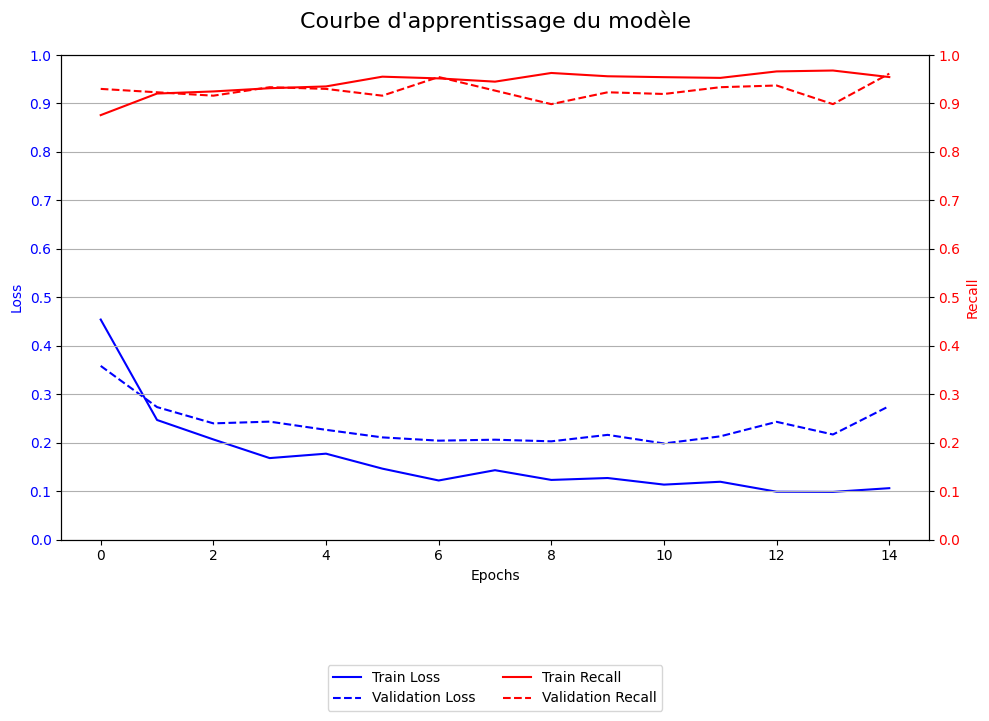

In [47]:
learning_curves(df,11)

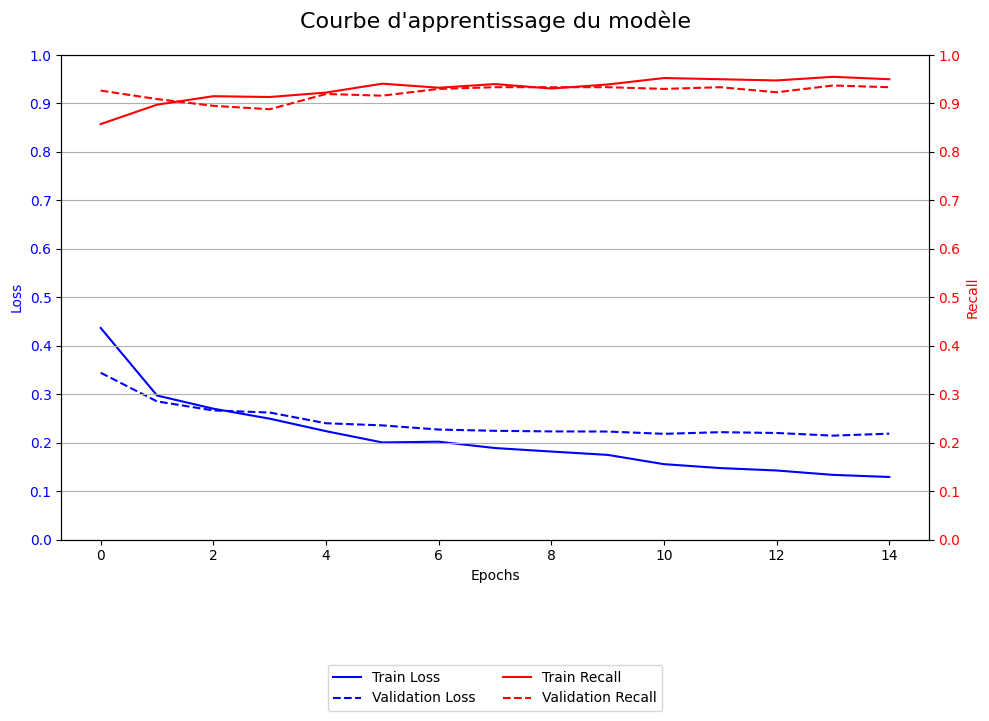

In [48]:
learning_curves(df,3)

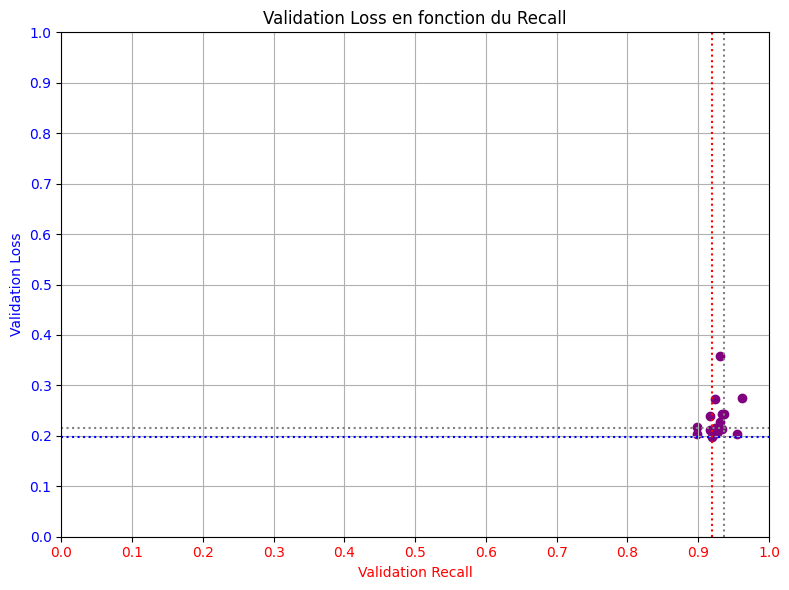

In [49]:
plot_loss_recall(df,11,3)

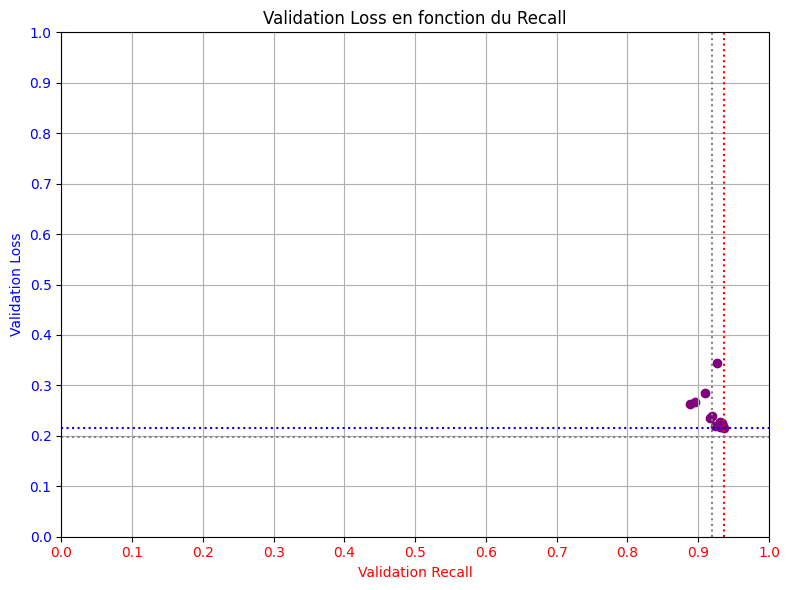

In [50]:
plot_loss_recall(df,3,11)

In [51]:
candidates.sort_values("recall", ascending=False)

,experimentation,trial,recall,loss
2,resnet50_2,19,0.952542,0.152405
3,resnet50_2,2,0.937063,0.149066
4,resnet50_3,3,0.937063,0.214731
5,resnet50_3,11,0.919580,0.198574
0,resnet50_1,5,0.800000,0.452690
1,resnet50_1,2,0.758741,0.441346


In [52]:
candidates.sort_values("loss")

,experimentation,trial,recall,loss
3,resnet50_2,2,0.937063,0.149066
2,resnet50_2,19,0.952542,0.152405
5,resnet50_3,11,0.919580,0.198574
4,resnet50_3,3,0.937063,0.214731
1,resnet50_1,2,0.758741,0.441346
0,resnet50_1,5,0.800000,0.452690


# resnet_50_5

## Tailles des images et traitement
Mêmes conditions que renet_50_2
## Paramètres
resnet_50_2 trial 19

In [53]:
columns =['trial', 'state', 'recall', 'loss', 'unfrozen_layers','history']

In [54]:
df = pd.read_csv("../data/resnet50_5.csv",encoding="utf-8", header=0, names=columns)

In [55]:
df_head = df.iloc[:,:-1].sort_values("recall", ascending=False).head(5)
df_head

,trial,state,recall,loss,unfrozen_layers
18,18,COMPLETE,0.959322,0.167579,33
9,9,COMPLETE,0.959322,0.158834,21
3,3,COMPLETE,0.955932,0.159021,23
11,11,COMPLETE,0.955932,0.153684,11
7,7,COMPLETE,0.955932,0.181782,17


In [56]:
candidates.loc[len(candidates)] = ["resnet50_5"]+ list(df_head.iloc[0][["trial","recall","loss"]])

In [57]:
df_head = df.iloc[:,:-1].sort_values("loss", ascending=True).head(5)
df_head

,trial,state,recall,loss,unfrozen_layers
10,10,COMPLETE,0.949153,0.150625,19
11,11,COMPLETE,0.955932,0.153684,11
0,0,COMPLETE,0.928814,0.155448,1
13,13,COMPLETE,0.938983,0.156690,1
14,14,COMPLETE,0.925424,0.157339,27


In [58]:
candidates.loc[len(candidates)] = ["resnet50_5"]+ list(df_head.iloc[0][["trial","recall","loss"]])

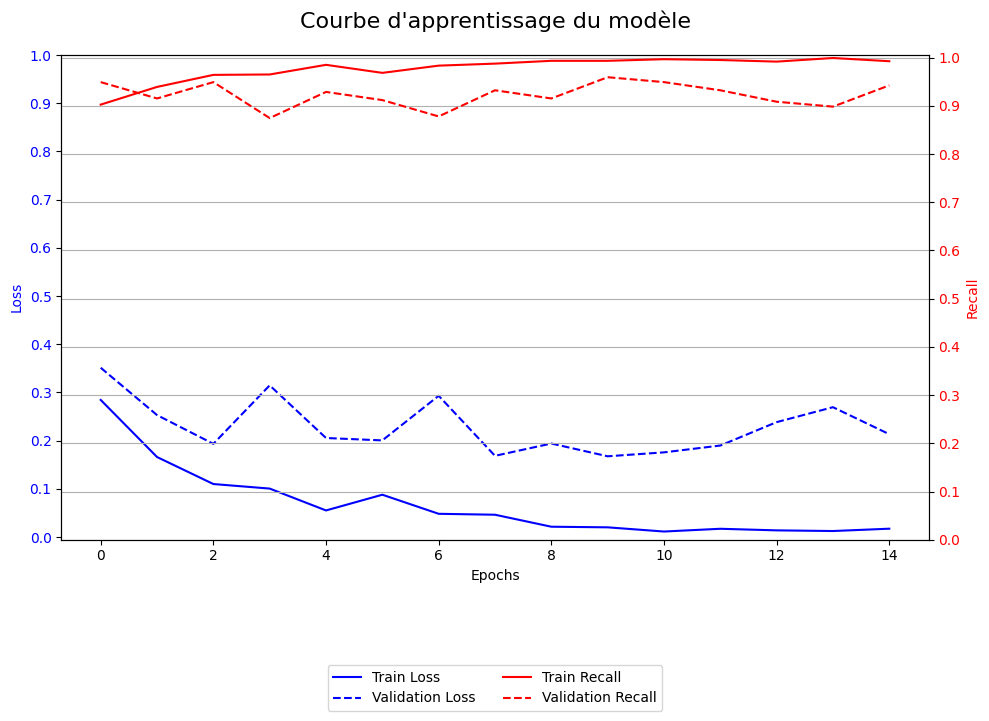

In [59]:
learning_curves(df,18)

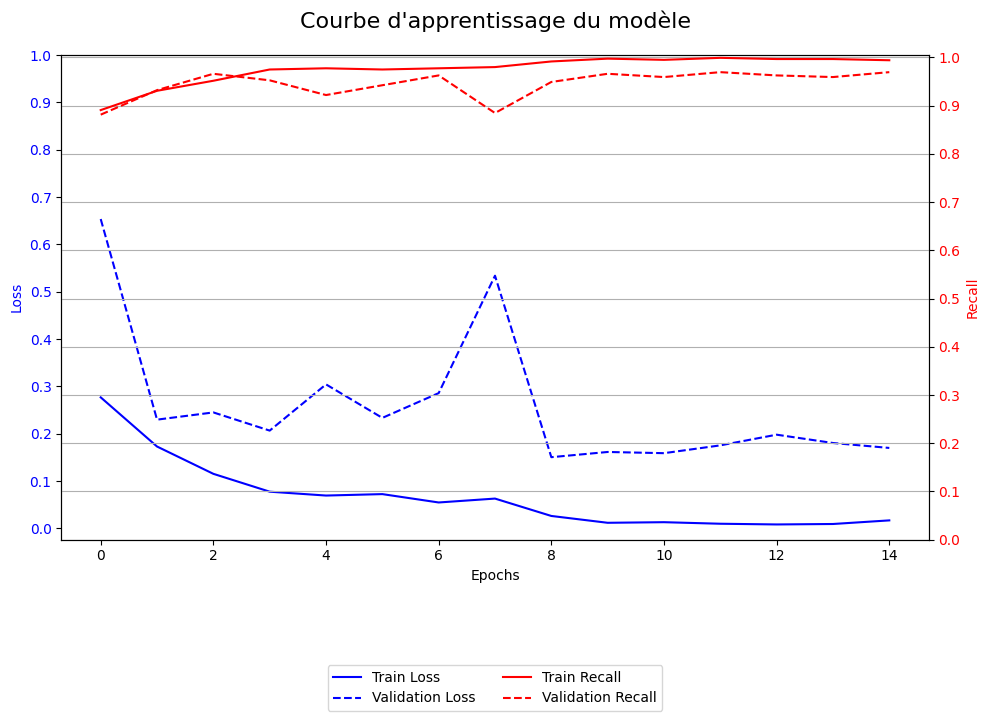

In [60]:
learning_curves(df,10)

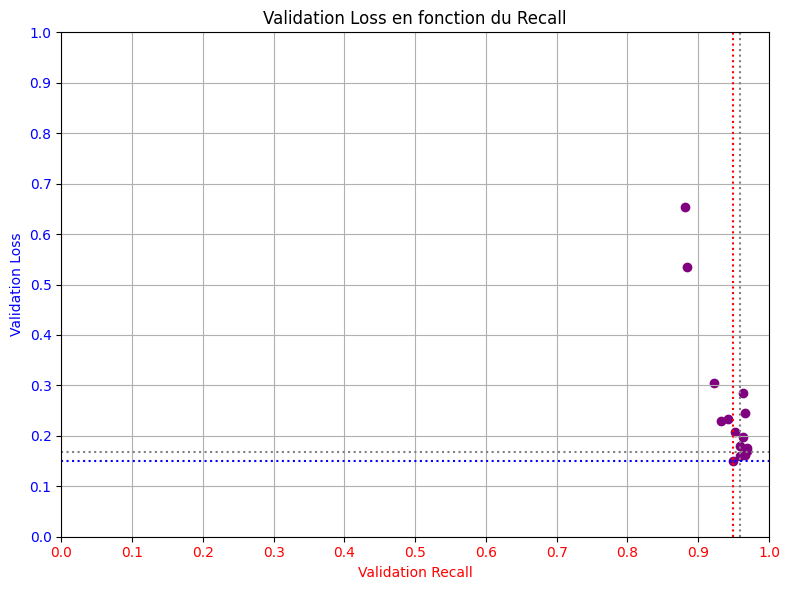

In [61]:
plot_loss_recall(df,10,18)

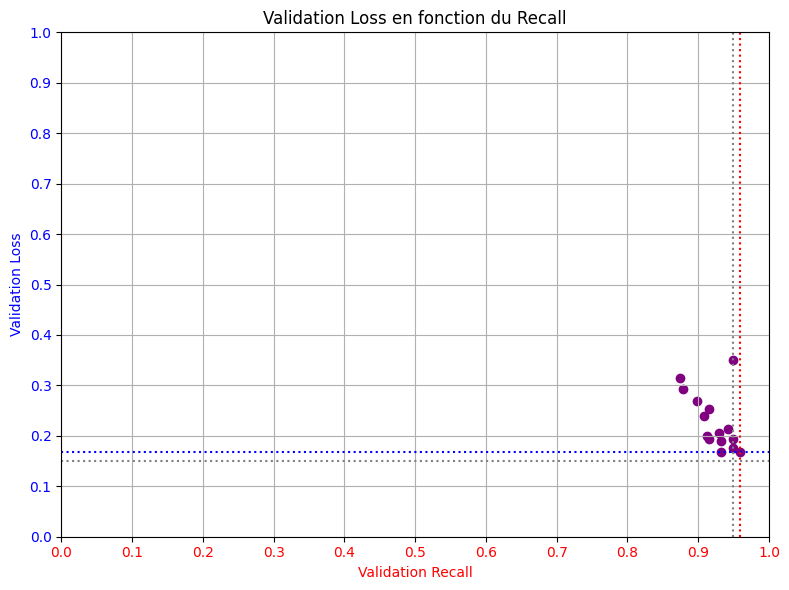

In [62]:
plot_loss_recall(df,18,10)

In [63]:
candidates.sort_values("recall", ascending=False)

,experimentation,trial,recall,loss
6,resnet50_5,18,0.959322,0.167579
2,resnet50_2,19,0.952542,0.152405
7,resnet50_5,10,0.949153,0.150625
3,resnet50_2,2,0.937063,0.149066
4,resnet50_3,3,0.937063,0.214731
5,resnet50_3,11,0.919580,0.198574
0,resnet50_1,5,0.800000,0.452690
1,resnet50_1,2,0.758741,0.441346


In [64]:
candidates.sort_values("loss")

,experimentation,trial,recall,loss
3,resnet50_2,2,0.937063,0.149066
7,resnet50_5,10,0.949153,0.150625
2,resnet50_2,19,0.952542,0.152405
6,resnet50_5,18,0.959322,0.167579
5,resnet50_3,11,0.919580,0.198574
4,resnet50_3,3,0.937063,0.214731
1,resnet50_1,2,0.758741,0.441346
0,resnet50_1,5,0.800000,0.452690


## Modèle 18

In [65]:
model = load_model("../models/resnet50_5_18.keras")
y_pred = model.predict(val_generator)

75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 140ms/step


In [66]:
print("recall    : ", recall_score(y_true,y_pred>=0.5))
print("precision : ",precision_score(y_true,y_pred>=0.5))
print("F1        : ",f1_score(y_true,y_pred>=0.5))

recall    :  0.7933333333333333
precision :  0.8469750889679716
F1        :  0.8192771084337349


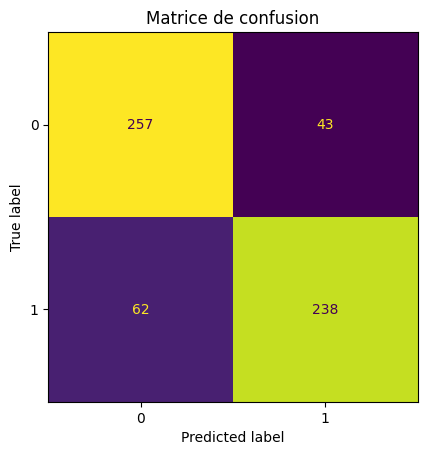

In [67]:
plot_confusion(y_true,y_pred)

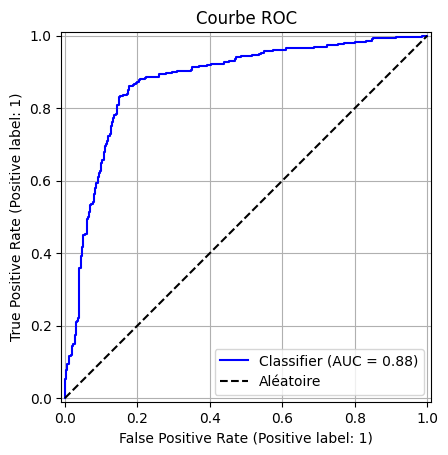

In [68]:
plot_roc_auc(y_true,y_pred)

## Modèle 10

In [69]:
model = load_model("../models/resnet50_5_10.keras")
y_pred = model.predict(val_generator)

75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step


In [70]:
print("recall    : ", recall_score(y_true,y_pred>=0.5))
print("precision : ",precision_score(y_true,y_pred>=0.5))
print("F1        : ",f1_score(y_true,y_pred>=0.5))

recall    :  0.7433333333333333
precision :  0.8745098039215686
F1        :  0.8036036036036036


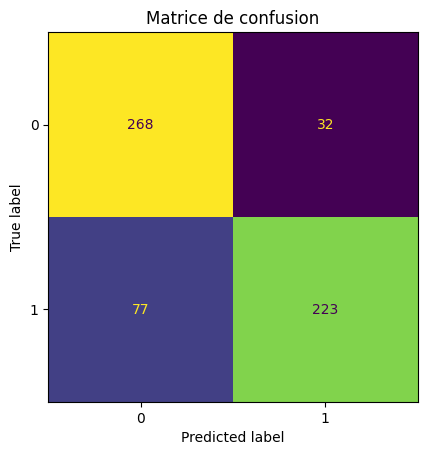

In [71]:
plot_confusion(y_true,y_pred)

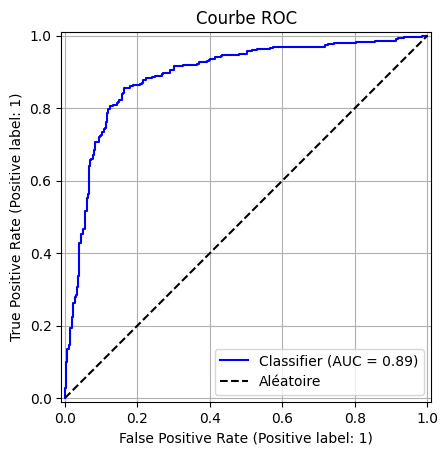

In [72]:
plot_roc_auc(y_true,y_pred)